the value of h is 0.009425720532822661


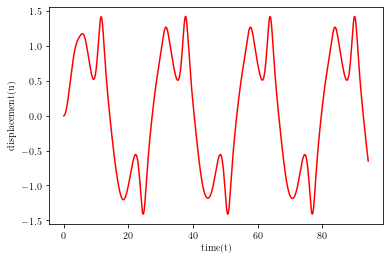

The value of GAMMA = 0.35


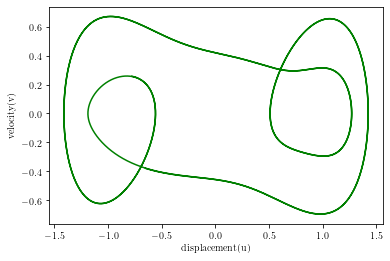

SAMPLING


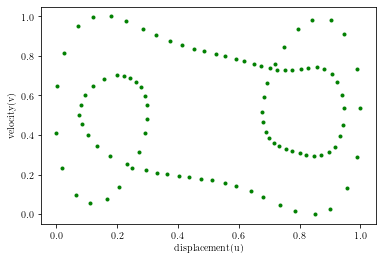

In [47]:
### duffing oscillator

import matplotlib
import numpy as np
from numpy import zeros, linspace, pi, cos, array
from matplotlib import pyplot as plt

t0=0
tf=30*pi
omega=1.2                     
beta=1              
delta=0.3             
gamma=0.35          
alpha=1              
n=10000                                    #iteration

sampsize=100                               #SampleSize
sampstart=5000                             #SampleStart
sampend=n                                  #SampleEnd

h=(tf-t0)/(n-1)                            #stepsize
print('the value of h is',h)
u0=0                                       #initial displacement


t=linspace(t0,tf,n)
v=zeros([n])
u=zeros([n])
u[0]=u0
v[0]=0                                     #initial velocity

##### DEFINING FUNCTIONS

def dudt(t,u,v):                                                #### u' = v                                              
    return(v)

def funt(t,u,v):                                                #### v' = -delta*v+alpha*u-beta*u**3+gamma*cos(omega*t)   
    return (-delta*v+alpha*u-beta*u**3+gamma*cos(omega*t))

######  RK4 ALGORITHM USING FOR LOOP
 
for i in range(1,n):
    k1=h*dudt(t[i-1],u[i-1],v[i-1])
    l1=h*funt(t[i-1],u[i-1],v[i-1])
    
    k2=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    l2=h*funt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    
    k3=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    l3=h*funt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    
    k4=h*dudt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    l4=h*funt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    
    u[i]=u[i-1]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    v[i]=v[i-1]+(1/6)*(l1+(2*l2)+(2*l3)+l4)

### PLOT

plt.plot(t,u,'-r')
plt.xlabel('time(t)')
plt.ylabel('displacement(u)')
plt.show()
print('The value of GAMMA =',gamma)
fig = plt.figure()
plt.plot(u[sampstart:sampend],v[sampstart:sampend],'-g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()

#### InterPlay

import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
uu = xx(u[sampstart:sampend:int(sampsize/2)])
vv = xx(v[sampstart:sampend:int(sampsize/2)])
huh = np.array(list(zip(uu,vv)))

huh = huh[np.random.choice(huh.shape[0], sampsize, replace=False), :]
u1,v1 = zip(*huh)

#print(huh)
pd.DataFrame(huh).to_csv("data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')

#### SAMPLING

print("SAMPLING")


fig = plt.figure()
plt.plot(u1,v1,'.g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()


Rips complex is of dimension 2 - 166750 simplices - 100 vertices


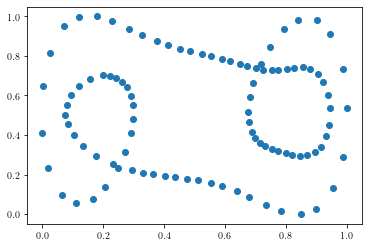

In [48]:
my_data = huh
import gudhi
rips_complex = gudhi.RipsComplex(points=my_data)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)

BarCodes_RipsAll = simplex_tree.persistence()
BarCodes_Rips1 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))

xd, yd = zip(*my_data)
plt.plot(xd, yd, 'o')

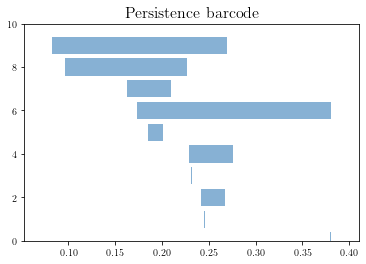

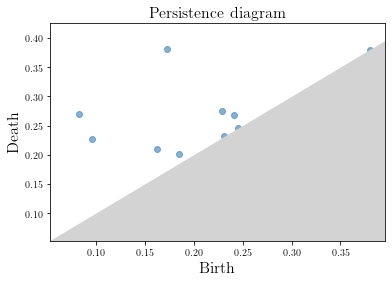

In [49]:
gudhi.plot_persistence_barcode(BarCodes_Rips1)
gudhi.plot_persistence_diagram(BarCodes_Rips1)

In [50]:
from gudhi import *
entropy = representations.Entropy(normalized=True)
entropy(np.array([j for i, j in BarCodes_Rips1]))

array([1.58632277])